In [ ]:
!pip install spotipy==2.23.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 34.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install billboard.py


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Genius.com lyric scraper

import re
import requests
from bs4 import BeautifulSoup
import time

def parentheses_cleaner(lyrics):
    '''Condenses parenthetical expressions printed on multiple new lines and appends it to the previous lyric 
    line without influencing any following lyrical content'''
    pattern = re.compile(r'(\s*\(\s*)(.*?)(\s*\)\s*)(?=\n|$)', re.DOTALL)

    def replace_pattern(match):
        removed_lines = ' '.join(match.group(2).split())
        return ' (' + removed_lines + ')'

    cleaned_lyrics = pattern.sub(replace_pattern, lyrics)
    cleaned_lyrics = re.sub(r'(\S)(\s*\(\s*.*?\s*\))', r'\1 \2', cleaned_lyrics)
    return cleaned_lyrics.strip()

def scrape_song_lyrics(url):
    '''Scrapes song lyrics from Genius given a url for a song'''
    try:
        response = requests.get(url)
        if response.status_code == 200:
            html_content = response.text
            soup = BeautifulSoup(html_content, 'html.parser')
            
            parent_container = soup.find("div", class_="lyrics") or soup.find("div", class_="lyricbox")
            if not parent_container:
                lyric_elements = soup.select("div[class*='Lyrics__Container'], div[class*='lyrics']")
                lyrics = '\n'.join([elem.get_text(separator="\n") for elem in lyric_elements]).strip()
            else:
                lyric_elements = parent_container.find_all(["div", "p"], recursive=True)
            
            lyrics = re.sub(r'\[.*?\]', '', lyrics, flags=re.DOTALL)
            lyrics = parentheses_cleaner(lyrics)

            return lyrics if lyrics else "Lyrics not found for {url}."
        else:
            return f"Failed to retrieve the webpage: HTTP {response.status_code} for {url}"

    except Exception as e:
        return f"An error occurred: {e}"


'# List of song URLs \nsongs_urls = [\n    \'https://genius.com/Kanye-west-ty-dolla-sign-and-rich-the-kid-carnival-lyrics\',\n    # Add more songs\n]\n\n# Loop through each song URL, scrape its lyrics, and print them\nfor url in songs_urls:\n    lyrics = scrape_song_lyrics(url)\n    print(lyrics)\n    print("\n" + "-"*60 + "\n")  \n    \n    # Rate limiter (I would not go below 10 otherwise it could raise alarms)\n    time.sleep(20)'

In [ ]:
# Spotify API Testing
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = "66fe334973004bbe98cbacd7cd52f0fd"
client_secret = "54922cf3dfd0424db4b3dff226749175"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

track_results = sp.search(q='artist:Ed Sheeran track:Shape of You', type='track')
track_id = track_results['tracks']['items'][0]['id']
print(f"Track ID: {track_id}")

audio_features = sp.audio_features(tracks=[track_id])[0]

print(f"Danceability: {audio_features['danceability']}")
print(f"Energy: {audio_features['energy']}")
print(f"Tempo: {audio_features['tempo']} BPM")

Track ID: 7qiZfU4dY1lWllzX7mPBI3
Danceability: 0.825
Energy: 0.652
Tempo: 95.977 BPM


In [ ]:
# Sentiment Analysis Testing

!pip install textblob
!python -m textblob.download_corpora

^C
ERROR: Operation cancelled by user

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
# Sentiment Analysis Testing

from textblob import TextBlob

blob = TextBlob(lyrics)
sentiment = blob.sentiment

valence = audio_features['valence']
energy = audio_features['energy']

print(f"Sentiment Analysis of 'Shape of You':\nPolarity: {sentiment.polarity}\nSubjectivity: {sentiment.subjectivity}")

# Deciding sentiment based on polarity
if sentiment.polarity > 0:
    print("Overall Sentiment: Positive")
elif sentiment.polarity < 0:
    print("Overall Sentiment: Negative")
else:
    print("Overall Sentiment: Neutral")

# Investigate correlations (simplified example)
polarity = blob.sentiment.polarity
if valence > 0.5 and polarity > 0:
    print("Both the music and lyrics convey a positive mood.")
elif valence < 0.5 and polarity < 0:
    print("Both the music and lyrics convey a negative mood.")
else:
    print("The mood conveyed by the music and lyrics might differ.")


'\nfrom textblob import TextBlob\n\nblob = TextBlob(lyrics)\nsentiment = blob.sentiment\n\nvalence = audio_features[\'valence\']\nenergy = audio_features[\'energy\']\n\nprint(f"Sentiment Analysis of \'Shape of You\':\nPolarity: {sentiment.polarity}\nSubjectivity: {sentiment.subjectivity}")\n\n# Deciding sentiment based on polarity\nif sentiment.polarity > 0:\n    print("Overall Sentiment: Positive")\nelif sentiment.polarity < 0:\n    print("Overall Sentiment: Negative")\nelse:\n    print("Overall Sentiment: Neutral")\n\n# Investigate correlations (simplified example)\npolarity = blob.sentiment.polarity\nif valence > 0.5 and polarity > 0:\n    print("Both the music and lyrics convey a positive mood.")\nelif valence < 0.5 and polarity < 0:\n    print("Both the music and lyrics convey a negative mood.")\nelse:\n    print("The mood conveyed by the music and lyrics might differ.")\n'

In [ ]:
# Getting Recent Billboard Data
import billboard
chart = billboard.ChartData('hot-100', date='2024-03-16')
print(chart)

hot-100 chart from 2024-03-16
-----------------------------
1. 'Carnival' by ¥$: Kanye West & Ty Dolla $ign Featuring Rich The Kid & Playboi Carti
2. 'Lose Control' by Teddy Swims
3. 'Lovin On Me' by Jack Harlow
4. 'Beautiful Things' by Benson Boone
5. 'Texas Hold 'Em' by Beyonce
6. 'Greedy' by Tate McRae
7. 'I Remember Everything' by Zach Bryan Featuring Kacey Musgraves
8. 'Snooze' by SZA
9. 'Agora Hills' by Doja Cat
10. 'Cruel Summer' by Taylor Swift
11. 'Stick Season' by Noah Kahan
12. 'Redrum' by 21 Savage
13. 'Saturn' by SZA
14. 'Fast Car' by Luke Combs
15. 'Last Night' by Morgan Wallen
16. 'Is It Over Now? (Taylor's Version) [From The Vault]' by Taylor Swift
17. 'Water' by Tyla
18. 'Thinkin' Bout Me' by Morgan Wallen
19. 'Whatever She Wants' by Bryson Tiller
20. 'Made For Me' by Muni Long
21. 'Flowers' by Miley Cyrus
22. 'Houdini' by Dua Lipa
23. 'End Of Beginning' by Djo
24. 'Pretty Little Poison' by Warren Zeiders
25. 'Paint The Town Red' by Doja Cat
26. 'Where The Wild Things 

In [ ]:
# Formatting Song Data Function
import re

def get_song_info(song):
    '''Takes a given song and formats it into two parts the song and the artist(s)'''
    text = re.search(r"'(.+)' by (.+)", song)
    song_name = text.group(1)
    song_name = re.sub(r"'", '', song_name)
    artist_names = text.group(2)
    artist_names = re.sub(r'\s+(Featuring|With)\s+.*$', '', artist_names)
    artists = re.split(r'[:,&]', artist_names)
    artists = [name.strip() for name in artists]
    return [song_name, artists]

In [ ]:
# Splitting the Song Data
song_names = []
artists_names = []

for song in chart:
    data = get_song_info(str(song))
    song_names.append(data[0])
    artists_names.append(data[1])
print(artists_names)

[['¥$', 'Kanye West', 'Ty Dolla $ign'], ['Teddy Swims'], ['Jack Harlow'], ['Benson Boone'], ['Beyonce'], ['Tate McRae'], ['Zach Bryan'], ['SZA'], ['Doja Cat'], ['Taylor Swift'], ['Noah Kahan'], ['21 Savage'], ['SZA'], ['Luke Combs'], ['Morgan Wallen'], ['Taylor Swift'], ['Tyla'], ['Morgan Wallen'], ['Bryson Tiller'], ['Muni Long'], ['Miley Cyrus'], ['Dua Lipa'], ['Djo'], ['Warren Zeiders'], ['Doja Cat'], ['Luke Combs'], ['Flo Milli'], ['Sabrina Carpenter'], ['HARDY'], ['Cody Johnson'], ['Ariana Grande'], ['Justin Timberlake'], ['Xavi'], ['Billie Eilish'], ['Jessie Murph', 'Jelly Roll'], ['Jelly Roll'], ['Olivia Rodrigo'], ['Cardi B'], ['YG Marley'], ['Drake'], ['Victoria Monet'], ['Tate McRae'], ['Parker McCollum'], ['Morgan Wallen'], ['Jelly Roll'], ['JID'], ['Nicki Minaj'], ['Travis Scott'], ['GloRilla'], ['Kane Brown'], ['Nate Smith'], ['Yeat'], ['BossMan Dlow'], ['Drake'], ['The Weeknd', 'Jennie', 'Lily Rose Depp'], ['310babii'], ['Chayce Beckham'], ['Thomas Rhett'], ['Dua Lipa'], 

In [ ]:
# Main Execution - Tracklist (Songs + Artists)

artist_tracks = {}
for index in range(len(song_names)):
    if artists_names[index][0] in artist_tracks:
        artist_tracks[artists_names[index][0]].append(song_names[index])
    else:
        artist_tracks[artists_names[index][0]] = []
        artist_tracks[artists_names[index][0]].append(song_names[index])


In [ ]:
print(artist_tracks)

{'¥$': ['Carnival', 'Burn', 'Fuk Sumn'], 'Teddy Swims': ['Lose Control'], 'Jack Harlow': ['Lovin On Me'], 'Benson Boone': ['Beautiful Things'], 'Beyonce': ['Texas Hold Em', '16 Carriages'], 'Tate McRae': ['Greedy', 'Exes'], 'Zach Bryan': ['I Remember Everything', 'Oklahoma Smokeshow'], 'SZA': ['Snooze', 'Saturn'], 'Doja Cat': ['Agora Hills', 'Paint The Town Red'], 'Taylor Swift': ['Cruel Summer', 'Is It Over Now? (Taylors Version) [From The Vault]'], 'Noah Kahan': ['Stick Season', 'Forever'], '21 Savage': ['Redrum', 'Nee-nah', 'Prove It'], 'Luke Combs': ['Fast Car', 'Where The Wild Things Are'], 'Morgan Wallen': ['Last Night', 'Thinkin Bout Me', 'Man Made A Bar', 'Spin You Around (1/24)'], 'Tyla': ['Water'], 'Bryson Tiller': ['Whatever She Wants'], 'Muni Long': ['Made For Me'], 'Miley Cyrus': ['Flowers'], 'Dua Lipa': ['Houdini', 'Training Season'], 'Djo': ['End Of Beginning'], 'Warren Zeiders': ['Pretty Little Poison'], 'Flo Milli': ['Never Lose Me'], 'Sabrina Carpenter': ['Feather'], 

In [ ]:
# Main Execution - Audio Features
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = "66fe334973004bbe98cbacd7cd52f0fd"
client_secret = "54922cf3dfd0424db4b3dff226749175"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

song_audio_features = []
track_names = []

for artist, tracks in artist_tracks.items():
    for track in tracks:
        query = f'artist:{artist} track:{track}'
        result = sp.search(q=query, type='track', limit=1)

        if result['tracks']['items']:
            track_info = result['tracks']['items'][0]
            track_id = track_info['id']
            track_name = track
            track_artist = artist
            '''track_ids.append(track_id)'''

            audio_features = sp.audio_features(track_id)[0]

            song_audio_features.append({
                'artist': track_artist,
                'title': track_name,
                'track_id': track_id,
                'audio_features': audio_features
            })
        else:
            print(f"No results found for {track} by {artist}")


if song_audio_features:
    first_song = song_audio_features[0]
    print(f"Artist: {first_song['artist']}")
    print(f"Title: {first_song['title']}")
    print(f"Track ID: {first_song['track_id']}")
    print("Audio Features:")
    for feature, value in first_song['audio_features'].items():
        print(f"{feature}: {value}")
else:
    print("No song was processed.")

KeyboardInterrupt: 

In [ ]:
# Formatting Song Data into a Usable URL

def create_url(song_data):
    '''Takes song data in the form of song name | artist(s) and converts it into a link
        for the song lyric website Genius'''
    base_url = 'https://genius.com/'
    url = []
    song = re.sub(r'[^\w\s-]', ' ', song_data[0]).strip()
    song = re.sub(r'\s+', '-', song)
    all_names = ''
    if len(song_data[1]) == 1:
        all_names = song_data[1][0].replace(' ', '-')
    else:
        for index in range(len(song_data[1])):
            if index == max(range(len(song_data[1]))):
                all_names += '-and-' + song_data[1][index].replace(' ', '-')
            elif index > 0:
                all_names += '-' + song_data[1][index].replace(' ', '-')
            else:
                all_names = song_data[1][0].replace(' ', '-')
    url.append(base_url + all_names + '-' + song + '-lyrics')
    return url

In [ ]:
# Main Execution - Lyrics
song_lyrics = {}

for index in range(len(song_names)):
    time.sleep(20)
    url_artists = artists_names[index]
    filterered_artists = []
    for artist in url_artists:
        if bool(re.match(r'^[\W_]+$', artist)) == False:
            artist = artist.replace('$', 'S')
            filterered_artists.append(artist)
    song = song_names[index]
    url_song = song.replace('@', 'at')
    song_data = [url_song, filterered_artists]
    url = create_url(song_data)[0]
    lyrics = scrape_song_lyrics(url)
    song_lyrics[song] = lyrics
    




NameError: name 'create_url' is not defined

In [ ]:
# Sentiment Analysis and Data Formatting

from textblob import TextBlob
sentiment_data = {}

for song, lyrics in song_lyrics.items():
    
    blob = TextBlob(lyrics)
    sentiment = blob.sentiment
    
    # getting the dict that contains the audio features of a given song
    index = 0
    for dictionary in song_audio_features:
        if dictionary['title'].lower() == song.lower():
            break
        else:
            index += 1
    
    # Defining variables
    artist = song_audio_features[index]['artist']
    valence = song_audio_features[index]['audio_features']['valence']
    energy = song_audio_features[index]['audio_features']['energy']
    danceability = song_audio_features[index]['audio_features']['danceability']
    tempo = song_audio_features[index]['audio_features']['tempo']
    loudness = song_audio_features[index]['audio_features']['loudness']
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity

    # Overall Sentiment Analysis
    if sentiment.polarity > 0:
        overall_sentiment = 'Positive'
    elif sentiment.polarity < 0:
        overall_sentiment = 'Negative'
    else:
        overall_sentiment = 'Positive'
    
    # Storing Data
    sentiment_data[song] = {'Artist': artist,
                            'Overall Sentiment': overall_sentiment, 
                            'Polarity': polarity,
                            'Subjectivity': subjectivity,
                            'Valence': valence, 
                            'Energy': energy,
                            'Loudness': loudness,
                            'Tempo': tempo,
                            'Danceability': danceability}






NameError: name 'song_lyrics' is not defined

In [1]:
# Storing Relevant Data in a Dataframe
import pandas as pd
'''
rows = [{**{'Song': song}, **data} for song, data in sentiment_data.items()]
df = pd.DataFrame(rows)
df.to_csv('data.csv', index=False)
'''

"\nrows = [{**{'Song': song}, **data} for song, data in sentiment_data.items()]\ndf = pd.DataFrame(rows)\ndf.to_csv('data.csv', index=False)\n"

In [2]:
# Loading Data Frame and Displaying it
df = pd.read_csv("data.csv")
df.head(100)

,Song,Artist,Overall Sentiment,Polarity,Subjectivity,Valence,Energy,Loudness,Tempo,Danceability
0,Carnival,¥$,Positive,0.010955,0.568098,0.311,0.811,-5.746,148.144,0.594
1,Lose Control,Teddy Swims,Positive,0.041739,0.410426,0.242,0.604,-4.409,159.920,0.561
2,Lovin On Me,Jack Harlow,Negative,-0.041799,0.424699,0.606,0.558,-4.911,104.983,0.943
3,Beautiful Things,Benson Boone,Positive,0.385714,0.686905,0.219,0.471,-5.692,105.029,0.472
4,Texas Hold Em,Beyonce,Negative,-0.063019,0.460030,0.353,0.709,-6.514,110.024,0.725
...,...,...,...,...,...,...,...,...,...,...
95,We Dont Fight Anymore,Carly Pearce,Negative,-0.195833,0.500000,0.419,0.564,-6.517,129.944,0.619
96,Creek Will Rise,Conner Smith,Positive,0.092687,0.395408,0.892,0.887,-2.970,169.975,0.423
97,16 Carriages,Beyonce,Negative,-0.015104,0.452604,0.382,0.453,-7.047,127.246,0.525
98,Wondering Why,The Red Clay Strays,Positive,0.190972,0.563782,0.347,0.209,-12.437,148.590,0.524


In [ ]:
# Creating subsets of the DataFrame to be neatly compiled into LaTeX

sentiment_subset = df.iloc[:10, :5]
audio_subset = df.iloc[:10, [0] + list(range(-5, 0))]
sentiment_latex = sentiment_subset.to_latex(index=True, caption="Subset of Song Dataframe", label="tab:df_subset")
audio_latex = audio_subset.to_latex(index=True, caption="Audio Features", label="tab:df_subset")
print(sentiment_latex)
print(audio_latex)

\begin{table}
\caption{Subset of Song Dataframe}
\label{tab:df_subset}
\begin{tabular}{llllrr}
\toprule
 & Song & Artist & Overall Sentiment & Polarity & Subjectivity \\
\midrule
0 & Carnival & ¥$ & Positive & 0.010955 & 0.568098 \\
1 & Lose Control & Teddy Swims & Positive & 0.041739 & 0.410426 \\
2 & Lovin On Me & Jack Harlow & Negative & -0.041799 & 0.424699 \\
3 & Beautiful Things & Benson Boone & Positive & 0.385714 & 0.686905 \\
4 & Texas Hold Em & Beyonce & Negative & -0.063019 & 0.460030 \\
5 & Greedy & Tate McRae & Negative & -0.029240 & 0.604678 \\
6 & I Remember Everything & Zach Bryan & Positive & 0.076144 & 0.625817 \\
7 & Snooze & SZA & Positive & 0.144133 & 0.568240 \\
8 & Agora Hills & Doja Cat & Negative & -0.032440 & 0.509539 \\
9 & Cruel Summer & Taylor Swift & Negative & -0.104993 & 0.559264 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{Audio Features}
\label{tab:df_subset}
\begin{tabular}{llrrrrr}
\toprule
 & Song & Valence & Energy & Loudness & 

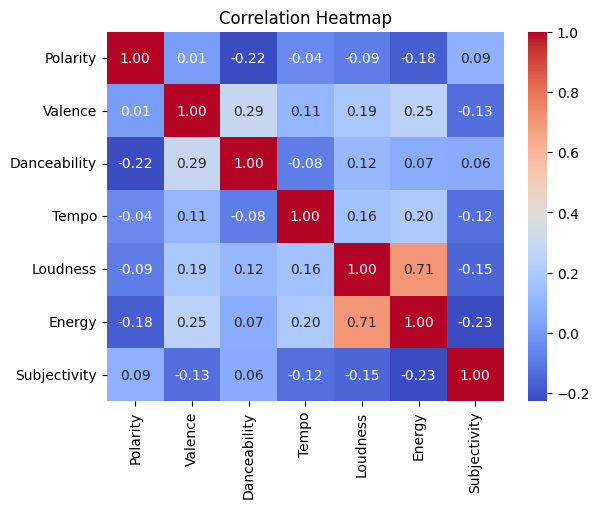

In [4]:
# Heat Plot
import matplotlib.pyplot as plt
import seaborn as sns

test = df[['Polarity','Valence', 'Danceability', 'Tempo', 'Loudness', 'Energy', 'Subjectivity']]
filtered = test[test['Polarity'] != 0]
corr_matrix = filtered.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Polarity vs Danceability')

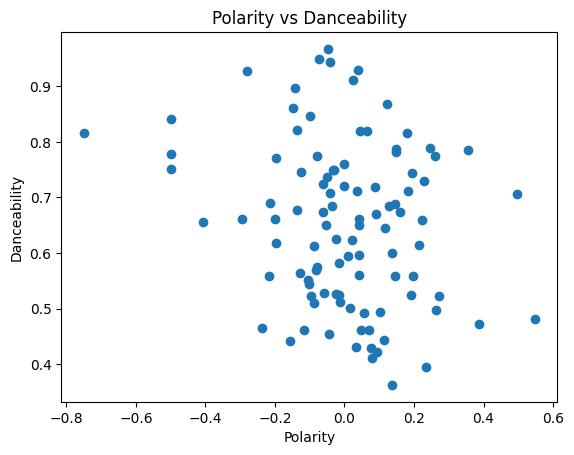

In [7]:
# Scatterplot Sample 1
plt.scatter(df['Polarity'], df['Danceability'])
plt.xlabel('Polarity')
plt.ylabel('Danceability')
plt.title('Polarity vs Danceability')

Text(0.5, 1.0, 'Polarity vs Energy')

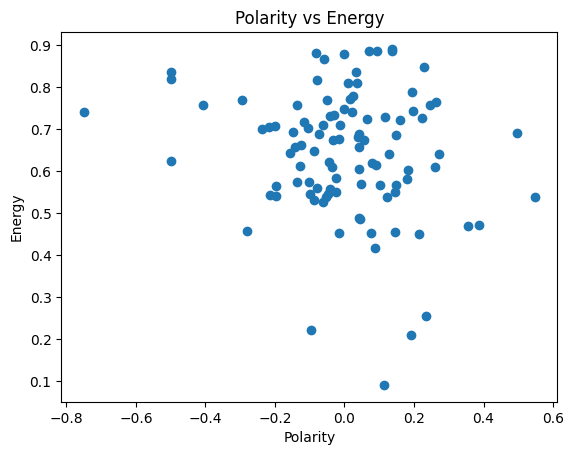

In [8]:
# Scatterplot Sample 2
plt.scatter(df['Polarity'], df['Energy'])
plt.xlabel('Polarity')
plt.ylabel('Energy')
plt.title('Polarity vs Energy')

Text(0.5, 1.0, 'Loudness vs Energy')

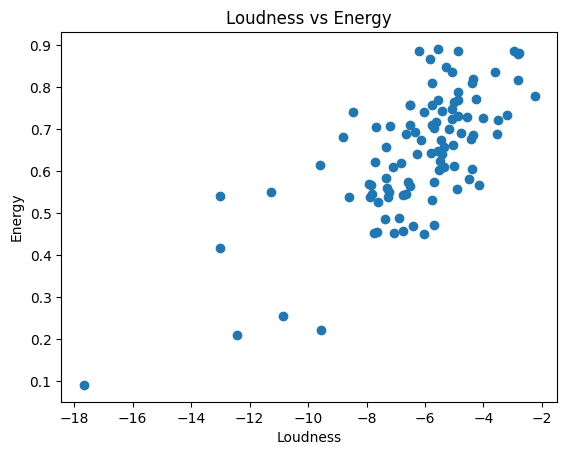

In [9]:
# Scatterplot Sample 3
plt.scatter(df['Loudness'], df['Energy'])
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Loudness vs Energy')

In [ ]:
!pip install plotly
!pip install plotly chart-studio


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 15.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Interactive Plot (Hoverable Points Only)

import plotly.express as px

fig = px.scatter(df, x='Valence', y='Polarity',
                 hover_data=['Song', 'Artist'], 
                 title='Polarity vs. Valence')

fig.show()

In [ ]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 85.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Interactive Plot that others can access with a link. An HTML of the graph can be saved.
# This module displays the interactive plot in Jupyter. For the external web app, see next code block.

import pandas as pd
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from ipywidgets import interact, Dropdown
import chart_studio.tools as tls
import plotly.offline as py_offline

chart_studio.tools.set_credentials_file(username='jeffnguyen177', api_key='lFuxBnVNDJeGMgoxnZ6Z')

def update_plot(x_axis, y_axis, upload=False, save_html=False):
    '''Generates a plot of the data with interactive features to change axes variables, and the option to save the
    plot as an html file'''
    fig = go.Figure(data=go.Scatter(x=df[x_axis],
                                    y=df[y_axis],
                                    mode='markers',
                                    text=df['Song'] + " by " + df['Artist'],
                                    marker=dict(color='LightSkyBlue', size=10, opacity=0.5)))
    
    fig.update_layout(title=f'{x_axis} vs. {y_axis}',
                      xaxis_title=x_axis,
                      yaxis_title=y_axis,
                      hovermode='closest')
    
    if upload:
        upload_plot(fig, filename=f'{x_axis}_vs_{y_axis}')
    elif save_html:
        file_name = f"{x_axis}_vs_{y_axis}.html"
        py_offline.plot(fig, filename=file_name, auto_open=True, include_plotlyjs=True)
        print(f"Plot saved as {file_name}")
    else:
        fig.show()
        
def upload_plot(fig, filename):
    '''Uploads the plot to Chart-Studio'''
    # Upload the plot with public access
    plot_url = py.plot(fig, filename=filename, auto_open=True, sharing='public')
    print(f"Plot is available at: {plot_url}")

x_axis_dropdown = Dropdown(options=list(df.columns), value='Polarity', description='X-axis')
y_axis_dropdown = Dropdown(options=list(df.columns), value='Subjectivity', description='Y-axis')
upload_checkbox = Dropdown(options=[False, True], description='Upload?')

interact(update_plot, x_axis=x_axis_dropdown, y_axis=y_axis_dropdown, upload=upload_checkbox)

interactive(children=(Dropdown(description='X-axis', index=3, options=('Song', 'Artist', 'Overall Sentiment', …

<function __main__.update_plot(x_axis, y_axis, upload=False, save_html=False)>

In [ ]:
# Modified version of interactive scatterplot so that it can be hosted via web-app (not meant to run in Jupyter, this is just the source code)

# Import necessary libraries
import pandas as pd
import streamlit as st
import plotly.graph_objs as go

df = pd.read_csv("data.csv")

def update_plot(x_axis, y_axis):
    '''Generates a plot of the data with interactive features to change axes variables, and the option to save the
    plot as an html file, this time using Streamlit widgets instead of ipywidgets'''
    fig = go.Figure(data=go.Scatter(x=df[x_axis],
                                    y=df[y_axis],
                                    mode='markers',
                                    text=df['Song'] + " by " + df['Artist'],
                                    marker=dict(color='LightSkyBlue', size=10, opacity=0.5)))
    
    fig.update_layout(title=f'{x_axis} vs. {y_axis}',
                      xaxis_title=x_axis,
                      yaxis_title=y_axis,
                      hovermode='closest')
    
    st.plotly_chart(fig)

# Create Streamlit widgets for selecting the X and Y axis data
x_axis = st.selectbox('Select X-axis:', options=df.columns, index=0)
y_axis = st.selectbox('Select Y-axis:', options=df.columns, index=1)

# Add a button to update the plot
st.button('Update Plot', on_click=update_plot, args=(x_axis, y_axis))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32f995d3-ca40-4951-a1dd-783fa797d6ba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>